2024-09-26 14:15:38,168 [INFO] Number of channels: 3
2024-09-26 14:15:38,168 [INFO] Preparing dataset samples...
Listing samples: 100%|██████████| 100/100 [00:00<00:00, 1097.45it/s]
2024-09-26 14:15:38,262 [INFO] Total samples in dataset: 9300


Channel Data Statistics:
Channel 0: IC min=0.6644295454025269, IC max=0.6644295454025269
  Step 1: min=0.6644295454025269, max=0.6644295454025269
  Step 2: min=0.6644295454025269, max=0.6644295454025269
  Step 3: min=0.6644295454025269, max=0.6644295454025269
  Step 4: min=0.6644295454025269, max=0.6644295454025269
  Step 5: min=0.6644295454025269, max=0.6644295454025269
  Step 6: min=0.6644295454025269, max=0.6644295454025269
  Step 7: min=0.6644295454025269, max=0.6644295454025269
  Step 8: min=0.6644295454025269, max=0.6644295454025269
Channel 1: IC min=7.64794982899275e-09, IC max=0.4998920261859894
  Step 1: min=7.64794982899275e-09, max=0.49605339765548706
  Step 2: min=7.64794982899275e-09, max=0.48972687125205994
  Step 3: min=7.64794982899275e-09, max=0.4845048785209656
  Step 4: min=7.64794982899275e-09, max=0.479765385389328
  Step 5: min=7.64794982899275e-09, max=0.4740251898765564
  Step 6: min=7.64794982899275e-09, max=0.4703228771686554
  Step 7: min=7.64794982899275e-09

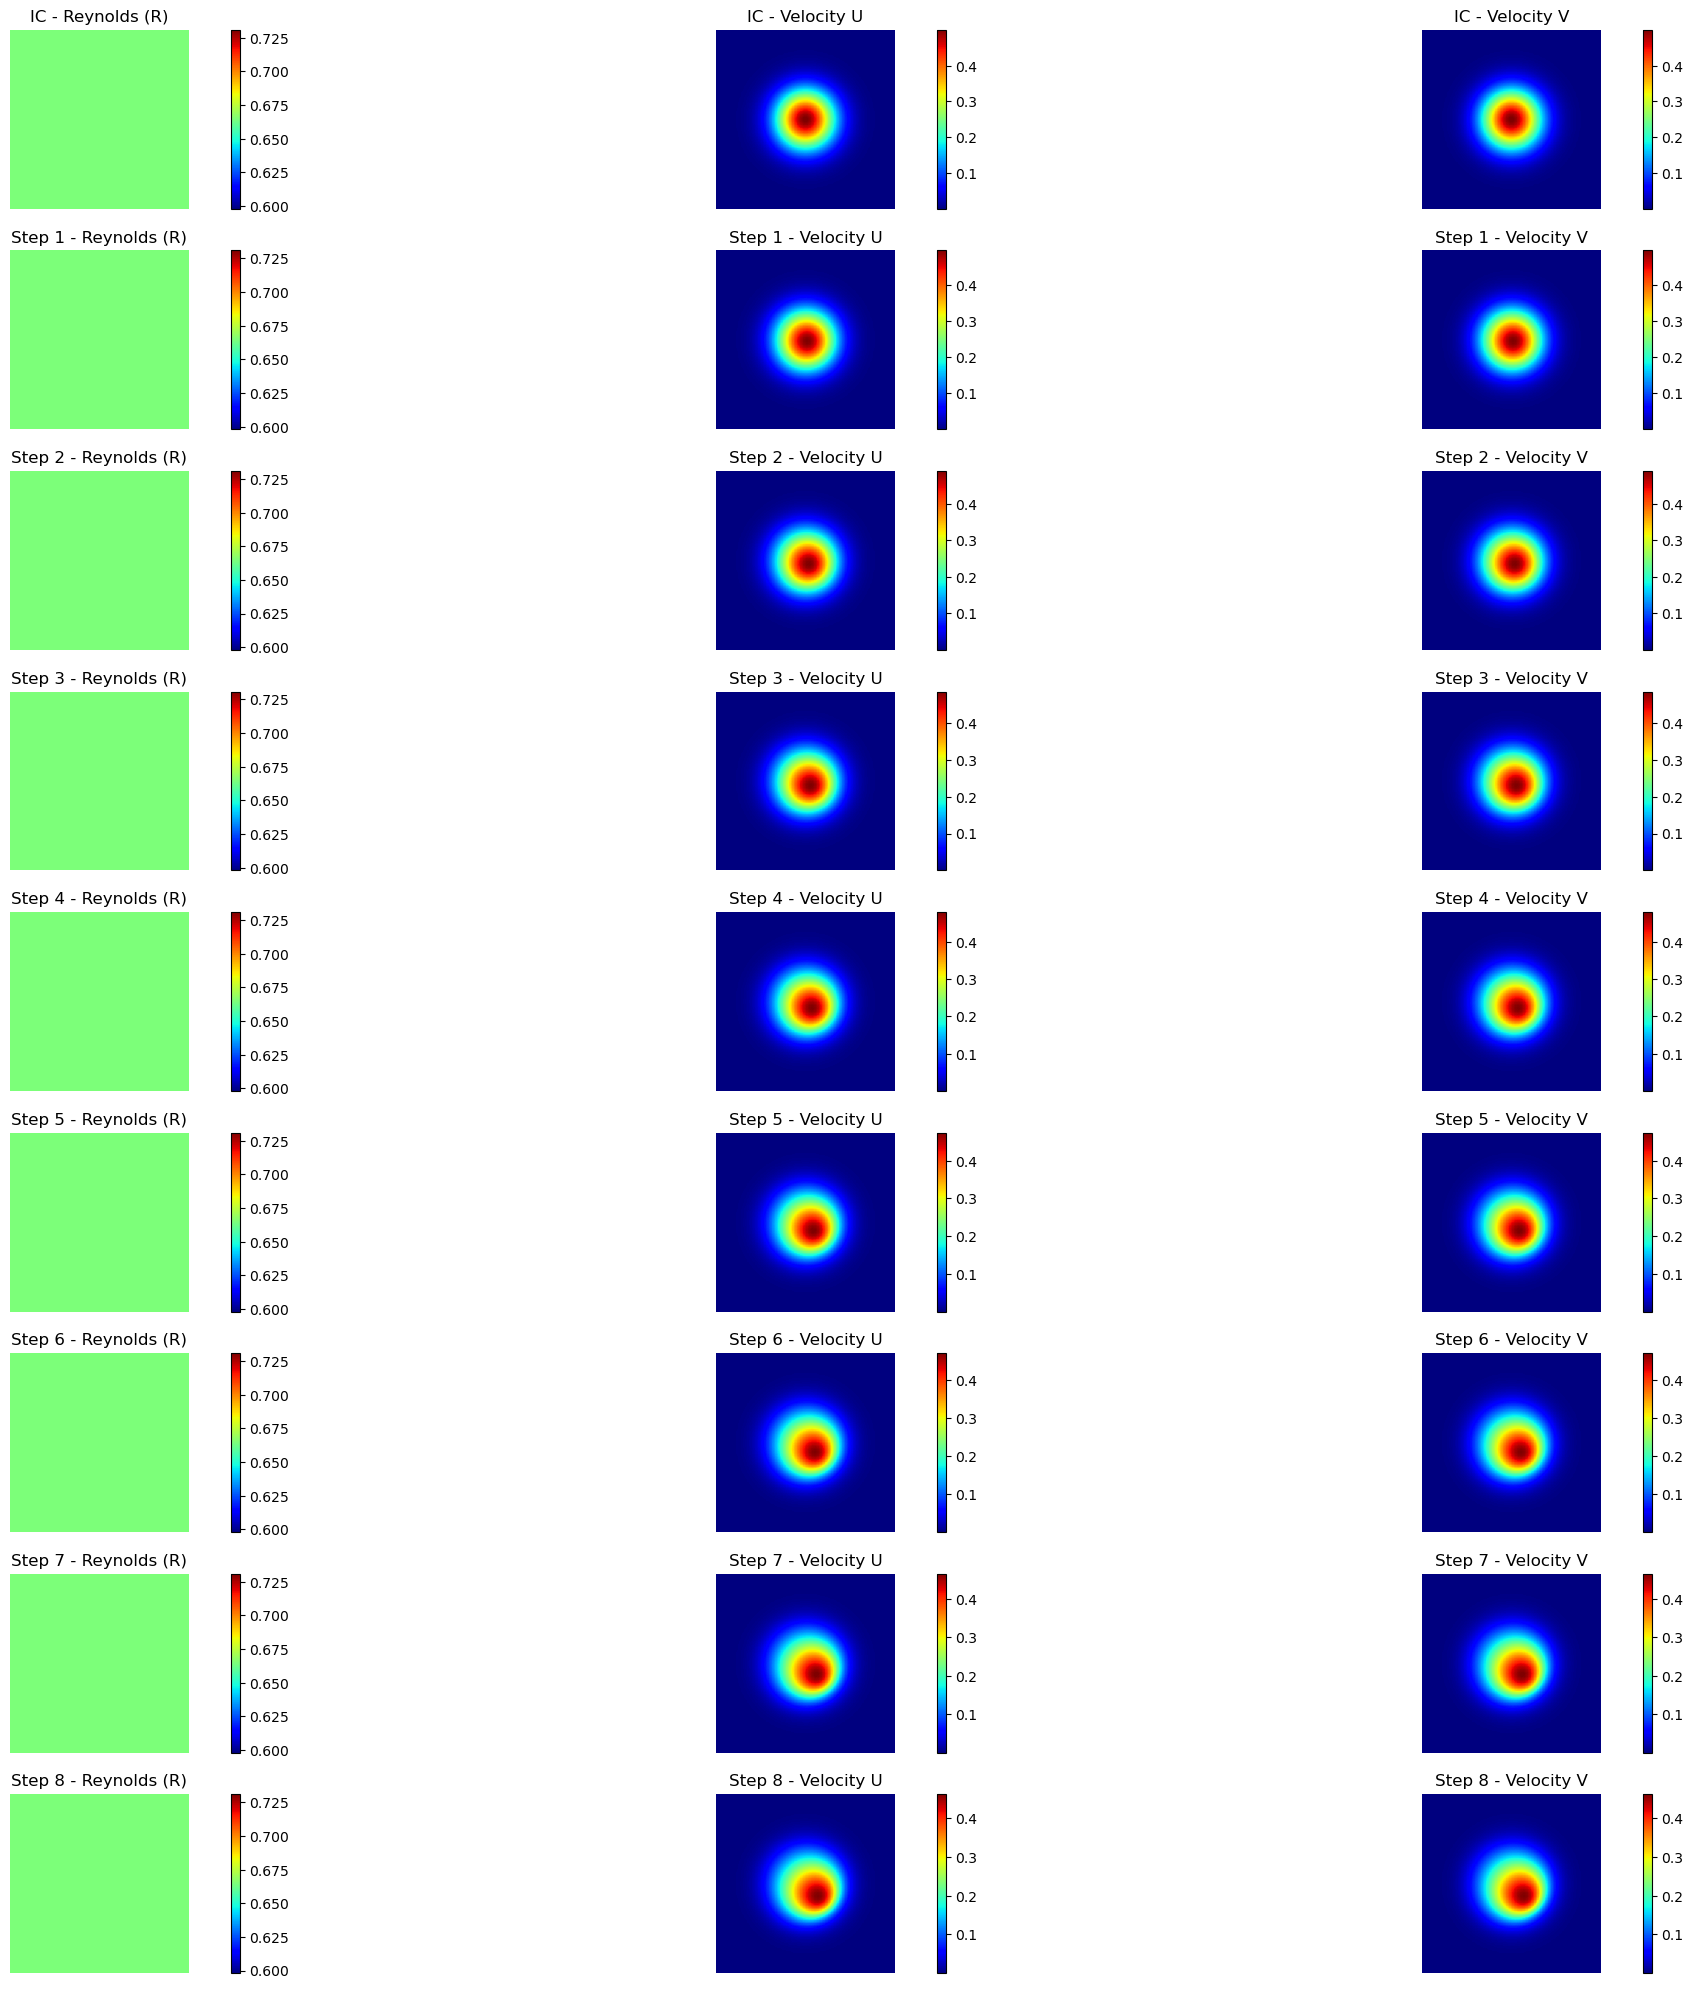

In [8]:
import sys
import os

# Add the root directory (PARCTorch) to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Now import the utilities
from data.dataset import GenericPhysicsDataset, custom_collate_fn, visualize_channels

import torch
from torch.utils.data import DataLoader
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s [%(levelname)s] %(message)s')

# Example configuration for HMX dataset
data_dir_train = '/project/vil_baek/data/physics/PARCTorch/Burgers/train'  # Replace with your actual train directory path
data_dir_test = '/project/vil_baek/data/physics/PARCTorch/Burgers/test'    # Replace with your actual test directory path
future_steps = 8
# Path to the min_max.json file
min_max_path = os.path.join('..', 'data', 'burgers_min_max.json')  # Correct path
batch_size = 8

# Initialize the dataset
train_dataset = GenericPhysicsDataset(
    data_dirs=[data_dir_train],
    future_steps=future_steps,
    min_max_path=min_max_path
)

# Create DataLoader for training dataset
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
    collate_fn=custom_collate_fn
)

# Fetch a batch and visualize
for batch in train_loader:
    ic, t0, t1, target = batch
    channel_names = ['Reynolds (R)', 'Velocity U', 'Velocity V']
    custom_cmaps = ['jet', 'jet', 'jet']

    visualize_channels(ic, t0, t1, target, channel_names=channel_names, channel_cmaps=custom_cmaps)
    break  # Visualize one batch for now
